In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
mercedes_df=pd.read_csv("Mercedes.csv")
mercedes_df
y=mercedes_df['y']
mercedes_df.drop(columns='y',inplace=True)

In [17]:
mercedes_df.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [18]:
mercedes_df.shape

(4209, 377)

In [19]:
missing_value_percentage_df=pd.DataFrame({'Column_Name':mercedes_df.columns,
                                          'Missing_value_count':mercedes_df.isnull().sum(),
                                          'Missing_value_percentage':mercedes_df.isnull().sum()/mercedes_df.shape[0]*100})

missing_value_percentage_df=missing_value_percentage_df.sort_values(by='Missing_value_percentage',ascending=False)

missing_value_percentage_df


,Column_Name,Missing_value_count,Missing_value_percentage
ID,ID,0,0.0
X255,X255,0,0.0
X264,X264,0,0.0
X263,X263,0,0.0
X262,X262,0,0.0
...,...,...,...
X128,X128,0,0.0
X127,X127,0,0.0
X126,X126,0,0.0
X125,X125,0,0.0


In [20]:
cols_to_drop=[]

cols_with_missing_values_grt_50=list(missing_value_percentage_df[missing_value_percentage_df['Missing_value_percentage']>50].index)

for col in mercedes_df.columns:
    if mercedes_df[col].nunique()==mercedes_df.shape[0] or mercedes_df[col].nunique()==1:
        cols_to_drop.append(col)
        

columns_to_drop=cols_to_drop+cols_with_missing_values_grt_50

mercedes_df.drop(columns=columns_to_drop,inplace=True)


In [30]:
missing_value_percentage_df[missing_value_percentage_df['Missing_value_percentage']>50]

,Column_Name,Missing_value_count,Missing_value_percentage


In [21]:
mercedes_df.shape

(4209, 364)

In [23]:
mercedes_df.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [27]:
for col in mercedes_df.columns:
    if col!='':
        mercedes_df[col]=mercedes_df[col].astype(object)
        
mercedes_df[''].dtype


KeyError: ''

In [28]:
mercedes_df.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380    object
X382    object
X383    object
X384    object
X385    object
Length: 364, dtype: object

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(mercedes_df,y,test_size=0.2,random_state=43)


In [32]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [33]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoderExt()

for col in X_train.columns:
    if X_train[col].dtype=='object':
        le.fit(X_train[col])
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Text(0, 0.5, 'Explained variance ratio')

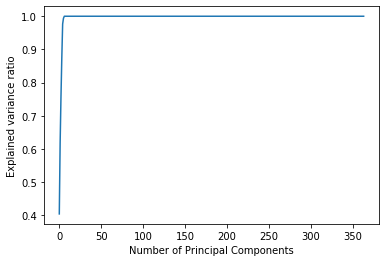

In [39]:
from sklearn.decomposition import PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

X_train_pca_df

pca.explained_variance_ratio_

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained variance ratio')




In [42]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

X_train_pca_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,12.593754,-5.594559,-1.197223,-3.657534,8.514618,5.670332,-3.114288,-0.012636,-2.430909e-15,1.410883e-15,...,8.052852e-17,-1.791906e-15,-8.611287e-16,1.927745e-16,-2.374165e-15,1.158332e-15,-9.629868e-16,1.289716e-15,-2.547303e-16,1.843866e-15
1,-18.993937,-5.844587,-4.978505,-1.588486,7.984731,4.167079,2.366180,-0.001287,-1.437359e-15,1.459535e-15,...,1.282037e-15,-2.496603e-15,-1.922961e-16,-8.069682e-16,-6.095331e-16,5.755863e-16,-4.119304e-16,-1.691958e-15,1.265822e-15,-1.547007e-15
2,-17.570405,2.964683,-6.221536,-3.571020,-11.261265,3.967500,-0.540114,-0.001184,-3.221853e-16,1.759919e-15,...,-2.143103e-15,-5.987805e-16,-3.285788e-17,-1.318466e-15,-2.014563e-16,2.008105e-15,-3.061078e-16,-7.821590e-16,-2.146647e-15,-4.498883e-16
3,-9.930535,2.041226,5.897292,15.249550,-4.821163,-2.327460,0.724132,-0.005810,-1.532711e-15,1.074278e-15,...,-1.125244e-15,3.058001e-16,-1.824795e-15,-1.745039e-15,3.070366e-16,-1.662974e-15,4.849704e-16,2.002215e-15,1.016713e-15,6.546040e-16
4,8.931622,-3.392308,-6.938280,6.449592,-0.753243,-4.205606,-0.834443,-0.004940,-1.356395e-15,2.461813e-15,...,3.061054e-15,2.214304e-15,-5.399477e-17,1.791020e-15,-8.914465e-16,1.149561e-15,-1.656477e-16,-8.280556e-16,-4.377036e-16,3.916032e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,17.238644,-11.789102,7.592638,3.495527,6.905017,-2.798978,-2.562329,-0.009269,-5.173599e-17,1.452474e-17,...,7.744406e-17,-1.106402e-16,-1.703596e-17,-1.698998e-17,-6.573614e-17,2.070977e-17,-1.083669e-16,1.619086e-16,1.012117e-16,1.409891e-16
3363,20.928549,15.675692,-1.893066,-4.209642,3.707565,4.130709,-0.697607,-0.006807,-3.212783e-17,2.788821e-17,...,-6.263157e-17,1.513795e-18,3.366067e-17,-1.960723e-17,-2.244008e-18,3.494430e-17,2.053985e-17,2.766943e-17,-1.130380e-16,3.180624e-17
3364,27.389674,14.668748,4.433724,-0.077765,-6.226275,3.673753,-1.196856,-0.008975,-6.991322e-17,7.841828e-17,...,5.011574e-17,6.466348e-17,3.595019e-17,5.150833e-17,-3.984163e-17,6.040126e-17,1.618500e-19,4.623345e-17,-1.078125e-16,8.436293e-17
3365,12.197590,-12.058780,10.159423,2.269712,10.418500,-1.743873,-1.579359,-0.008002,-2.837289e-17,-3.324932e-17,...,4.292038e-17,-1.031028e-16,-1.896464e-17,-2.389938e-17,-3.412546e-17,-3.100470e-17,-6.380765e-17,1.252160e-16,1.087610e-16,8.906812e-17


In [43]:
X_test_pca_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-12.705957,-7.931590,-7.926910,9.038338,8.263261,6.052314,-0.927964,-0.013827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-13.943805,17.642439,-1.621368,-8.953375,-1.243889,1.364025,-0.147633,0.003946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-15.430488,-12.428215,12.169127,13.659342,-1.078811,-0.792034,-0.745012,-0.008953,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-19.169919,-6.990265,-0.224898,-10.453778,9.421322,-1.056039,-0.483646,0.003988,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.770454,-10.406934,8.662871,4.353456,-0.477969,-2.754175,1.428132,-0.002673,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,-9.427154,11.050572,17.113853,4.433831,-3.405772,-1.457247,-1.282530,-0.002888,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,4.998669,-10.662352,-9.084261,-13.252278,-11.133366,-4.458773,-0.520981,0.007243,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,-16.637708,7.436405,-7.516182,0.985341,-4.557052,-1.652092,3.722617,0.006194,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,-11.166882,-0.274506,-2.734523,-5.155451,8.547508,-1.900491,-0.430348,0.001536,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]

vif['Column Name']=X_train.columns

vif



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,Column Name
0,1.099232,X0
1,1.143272,X1
2,1.049247,X2
3,1.066519,X3
4,1.004547,X4
...,...,...
359,0.000000,X380
360,0.000000,X382
361,0.000000,X383
362,0.000000,X384


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca=pd.DataFrame()
vif_pca["VIF Factor_PCA"]=[variance_inflation_factor(X_train_pca_df.values,i) for i in range (X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca



,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [59]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train_pca_df,y_train)

linreg_pred=linreg.predict(X_test_pca_df)

y_predict=linreg_pred

In [63]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test, y_predict))

print(mean_squared_error(y_test, y_predict))



0.08069659293294085
140.42482095466974


In [71]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train_pca_df,y_train)
y_dtree_pred=dtree.predict(X_test_pca_df)

y_dtree_pred


array([ 97.86      ,  89.51      , 110.43      ,  90.325     ,
        77.38      ,  88.05      , 104.31      , 108.39      ,
        76.33      ,  89.04      , 115.22      , 114.1       ,
       102.6       ,  91.99      ,  92.4       ,  92.26      ,
        86.41      , 101.76      ,  75.71      ,  90.85      ,
       104.25      ,  89.37      , 123.09      , 109.68      ,
        91.23      , 102.04      ,  86.31      , 115.60333333,
        90.79      , 109.66      , 102.33      ,  96.99      ,
       109.4       , 116.36      ,  87.63      ,  87.86      ,
        73.7       , 103.09      , 118.41      , 111.415     ,
        91.01      , 112.35333333,  99.49      , 107.14      ,
       110.91      , 109.12      ,  90.38      ,  86.73      ,
        89.17      ,  96.788     ,  97.79      ,  93.        ,
       108.88      ,  88.87      , 106.56      ,  94.25      ,
        92.83      ,  75.38      , 101.17      , 103.41      ,
        95.34      , 108.70666667,  95.97      , 108.88

In [72]:
y_dtree_pred.shape

(842,)

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(X_train_pca_df,y_train)
rfc_pred=rfc.predict(X_test_pca_df)

rfc_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 97.13      ,  94.746     ,  94.387     ,  93.829     ,
        86.993     ,  95.225     , 100.184     , 100.1345    ,
        75.70133333,  96.224     , 106.859     , 106.552     ,
        91.003     ,  92.262     ,  99.235     ,  92.432     ,
        95.216     , 103.167     ,  77.9365    ,  94.11      ,
       113.212     ,  90.167     , 123.743     , 107.251     ,
       104.671     ,  99.80166667,  97.527     , 110.91557143,
        90.633     , 111.205     ,  97.655     ,  92.494     ,
       100.729     , 117.021     ,  95.032     ,  96.957     ,
        89.98366667, 104.108     , 106.422     , 111.6379881 ,
        96.003     , 110.28116667, 102.694     , 106.607     ,
       110.728     , 104.3725    ,  91.311     ,  96.404     ,
        90.045     , 103.436     , 108.667     ,  92.539     ,
       112.32725   ,  93.393     , 104.4688    ,  96.4194    ,
        90.354     ,  76.763     , 103.666     , 102.80033333,
        97.584     , 110.16705238,  96.378     , 116.74

In [78]:
from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor()
ada.fit(X_train_pca_df,y_train)
ada_pred=ada.predict(X_test_pca_df)

ada_pred

array([105.59610641, 105.19735513, 105.19735513, 103.72344498,
       105.19735513,  99.16958084, 100.53442919, 105.90928748,
        95.92279446, 105.59610641, 105.90928748, 105.59610641,
       103.72344498, 105.19735513, 105.59610641, 105.19735513,
       100.53442919,  87.98866142,  87.98866142, 107.20798157,
       100.53442919, 105.19735513, 111.28640288, 109.5970227 ,
       103.72344498, 105.90928748, 109.27561328, 101.61878505,
       105.19735513, 100.53442919, 105.19735513, 105.19735513,
       103.72344498, 110.95901887, 105.19735513, 107.65111417,
       101.54593998, 105.59610641, 100.53442919, 101.61878505,
       105.59610641, 111.28640288, 103.72344498, 103.72344498,
       109.5970227 , 105.19735513, 105.90928748, 103.72344498,
       105.59610641, 109.5970227 , 110.06792453, 109.5970227 ,
       110.95901887, 105.59610641, 109.5970227 , 105.19735513,
       105.59610641,  87.98866142,  95.94841096, 105.59610641,
       105.59610641, 105.59610641, 105.90928748, 110.06

In [79]:
ada_pred.shape

(842,)

In [83]:
from sklearn.model_selection import GridSearchCV
hyp_dict={'max_depth':[4,5,6,7,8],
          'min_samples_split':[4,5,6],
          'min_samples_leaf':[3,4,5,6],
          'max_leaf_nodes':[45,6,7,8],}
grid_cv=GridSearchCV(dtree,param_grid=hyp_dict,cv=5)
grid_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [45, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_sp

In [84]:
grid_cv.best_params_
grid_cv.best_score_

0.5158343064496653

In [87]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(dtree,param_distributions=hyp_dict,cv=5,n_iter=500)

random_cv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 240 is smaller than n_iter=500. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=500, n_jobs=None,
                   param_d

In [86]:
random_cv.best_params_
random_cv.best_score_

0.5158343064496652

In [88]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
parameter_grid={'l1_ratio':[0.15,0.3,0.5,0.6],
                'alpha':[0.0001,0.001,0.01],
                'learning_rate':['adaptive','optimal'],
                 'eta0':[0.1,0.01,0.001]}
grid=GridSearchCV(sgd,cv=5,param_grid=parameter_grid)
grid.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'l1_ratio': [0.15, 0.3, 0.5, 0.6],
                         'learning_rate': ['adaptive', 'opt

In [89]:
grid_cv.best_params_
grid_cv.best_score_

0.5158343064496653

In [91]:
from sklearn.neighbors import KNeighborsRegressor
knc=KNeighborsRegressor()
parameter_grid={'n_neighbors':[5,8,10],
                 'weights':['uniform','distance'],
                 'p':[1,2],
                  'metric':['minkowski']}
grid=GridSearchCV(knc,cv=5,param_grid=parameter_grid)
grid.fit(X_train,y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 8, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)